In [4]:
import pandas as pd
from surprise import Dataset, Reader

import os

DATA_DIR = "data"
train_data = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
X = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(train_data, reader)
all_train = data.build_full_trainset()

In [5]:
from cv_logs import ParameterSearch

from surprise import SVD
from surprise.model_selection import RandomizedSearchCV
import numpy as np

ITERATION = 1000
FOLDS = 3
param_grid = {
    "n_factors": np.arange(5, 500, 25),
    "n_epochs": [200],
    "biased": [True, False],
    "lr_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}
gs = RandomizedSearchCV(
    SVD,
    param_grid,
    measures=["rmse"],
    cv=FOLDS,
    n_jobs=-1,
    n_iter=ITERATION,
    joblib_verbose=3,
)
gs.fit(data)
ps = ParameterSearch(gs.cv_results)
ps.write("svd_1.csv")
print(gs.best_score["rmse"])
print(gs.best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 37.2min


0.716466446380316
{'rmse': {'n_factors': 80, 'n_epochs': 200, 'biased': True, 'lr_all': 0.03981071705535002, 'reg_all': 0.10000000000000082, 'reg_bu': 0, 'reg_bi': 0}}


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 43.7min finished


In [6]:
from predict import predict
from cv_logs import save_model

svd_1 = SVD(**gs.best_params["rmse"]).fit(all_train)

# Public score: 0.66628
predict(svd_1, "svd_1.csv")
save_model(svd_1, "svd_1")

/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


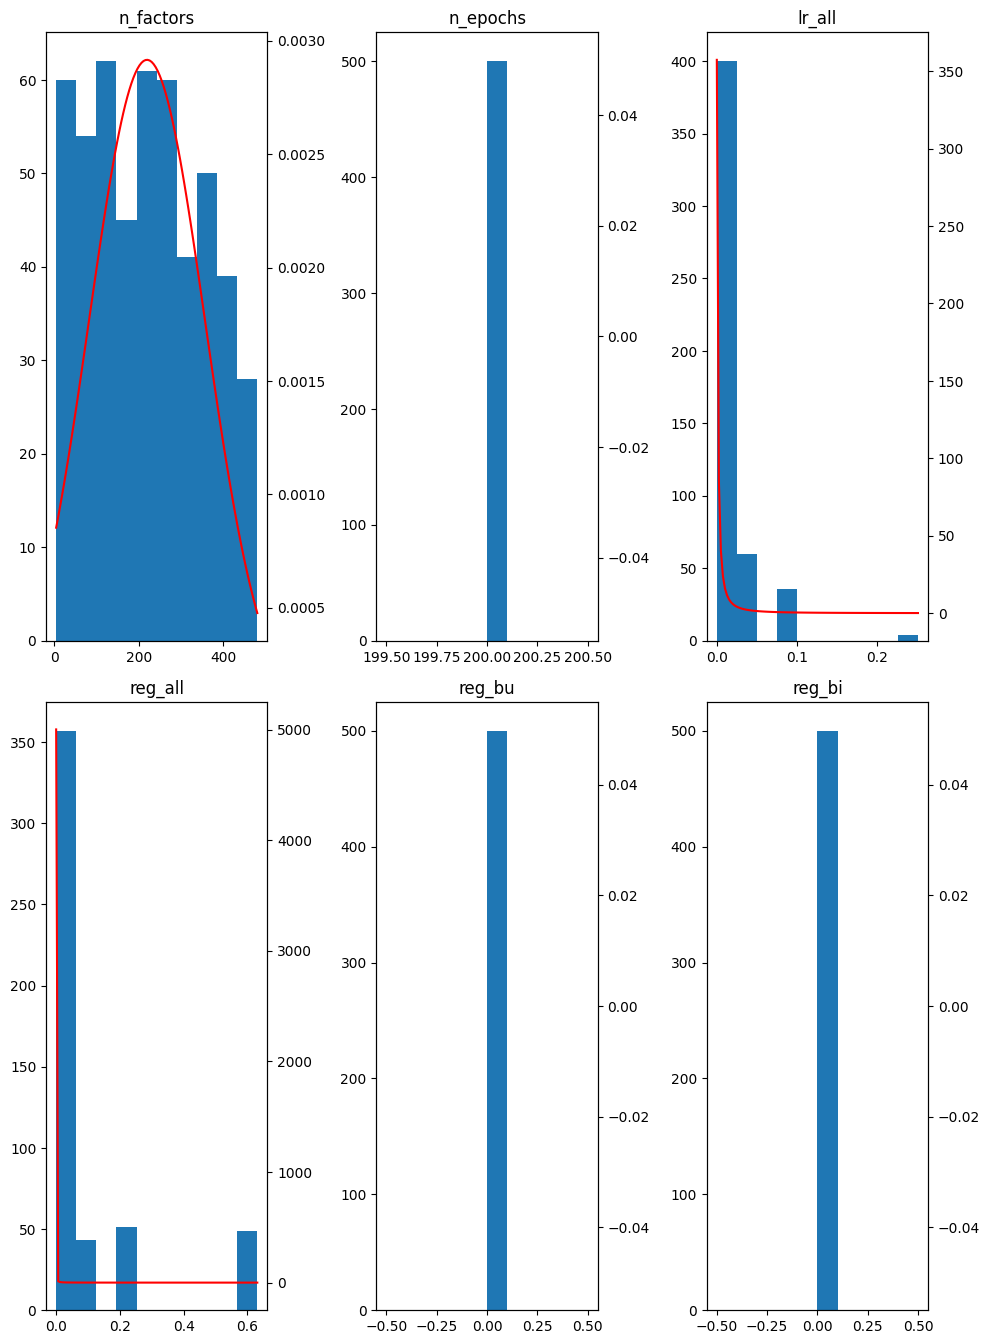

In [1]:
import matplotlib.pyplot as plt
from cv_logs import ParameterSearch

ps = ParameterSearch("cv/svd_1.csv")
best_params = ps.get_best_distribution(0.5)

In [2]:
best_params

{'n_factors': ('invgamma',
  0.0009765533774711183,
  (50.262107006949236, -751.1456051991718, 47780.65782855416)),
 'n_epochs': ('norm', nan, (200.0, 0.0)),
 'biased': None,
 'lr_all': ('pareto',
  8.370458814651537e-11,
  (0.6782386885307226, -0.0018354059126706947, 0.001898501647118714)),
 'reg_all': ('genextreme',
  5.80109216023014e-12,
  (-4.543703149687982, 0.00025139542855757383, 0.0010972743422621972)),
 'reg_bu': ('norm', nan, (0.0, 0.0)),
 'reg_bi': ('norm', nan, (0.0, 0.0))}

In [2]:
from evolution import Evolution

import numpy as np
from surprise import SVD

param_grid = {
    "n_factors": np.arange(5, 500, 25),
    "n_epochs": [200],
    "biased": [True, False],
    "lr_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}

const_params = {
    "n_epochs": [200],
    "reg_bu": [0],
    "reg_bi": [0],
}
int_params = ["n_factors"]

evo = Evolution(
    SVD,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
)
# 0.6671
# 0.66616
# 0.6697
evo.evolve(data, 3, 0.25, 1000, 3)

RUNNING EVOLUTION 0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 73.0min finished


RUNNING EVOLUTION 1


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

RUNNING EVOLUTION 2


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

In [3]:
# 0.66833
# 0.66967
# 0.66992
evo.evolve(data, 3, 0.2, 1000, 3)

RUNNING EVOLUTION 3


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.1min
[Parallel

RUNNING EVOLUTION 4


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 13.4min
[Parallel

RUNNING EVOLUTION 5


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 11.4min
[Parallel

In [5]:
# Elite evolution
# survival_rate = 0.01 i.e. Top 10
from evolution import Evolution

import numpy as np
from surprise import SVD

param_grid = {
    "n_factors": np.arange(1, 250, 2),
    "n_epochs": [200],
    "biased": [True, False],
    "lr_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}

const_params = {
    "n_epochs": [200],
    "reg_bu": [0],
    "reg_bi": [0],
}
int_params = ["n_factors"]

evo_elite = Evolution(
    SVD,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_elite",
)
evo_elite.evolve(data, 3, 0.01, 1000, 3)

RUNNING EVOLUTION 0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 26.1min finished


RUNNING EVOLUTION 1


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

RUNNING EVOLUTION 2


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

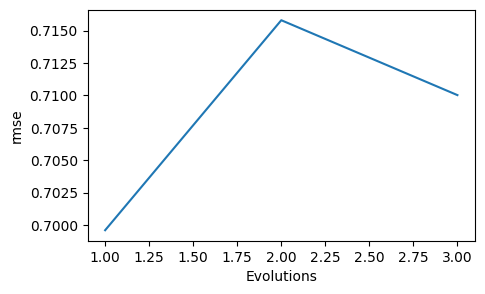

In [6]:
evo_elite.plot_errors()